In [9]:
housing =  pd.read_csv(r'C:\Users\Public\Documents\kaggle-data-sets\housing.csv')
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41,880,129.0,322,126,8.3252,452600,NEAR BAY
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500,NEAR BAY
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,352100,NEAR BAY
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,341300,NEAR BAY
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,342200,NEAR BAY


In [10]:
import sklearn
import numpy as np
from sklearn.model_selection import train_test_split
import pandas as pd

In [11]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  int64  
 3   total_rooms         20640 non-null  int64  
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  int64  
 6   households          20640 non-null  int64  
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  int64  
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(4), int64(5), object(1)
memory usage: 1.6+ MB


In [12]:
housing['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [13]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


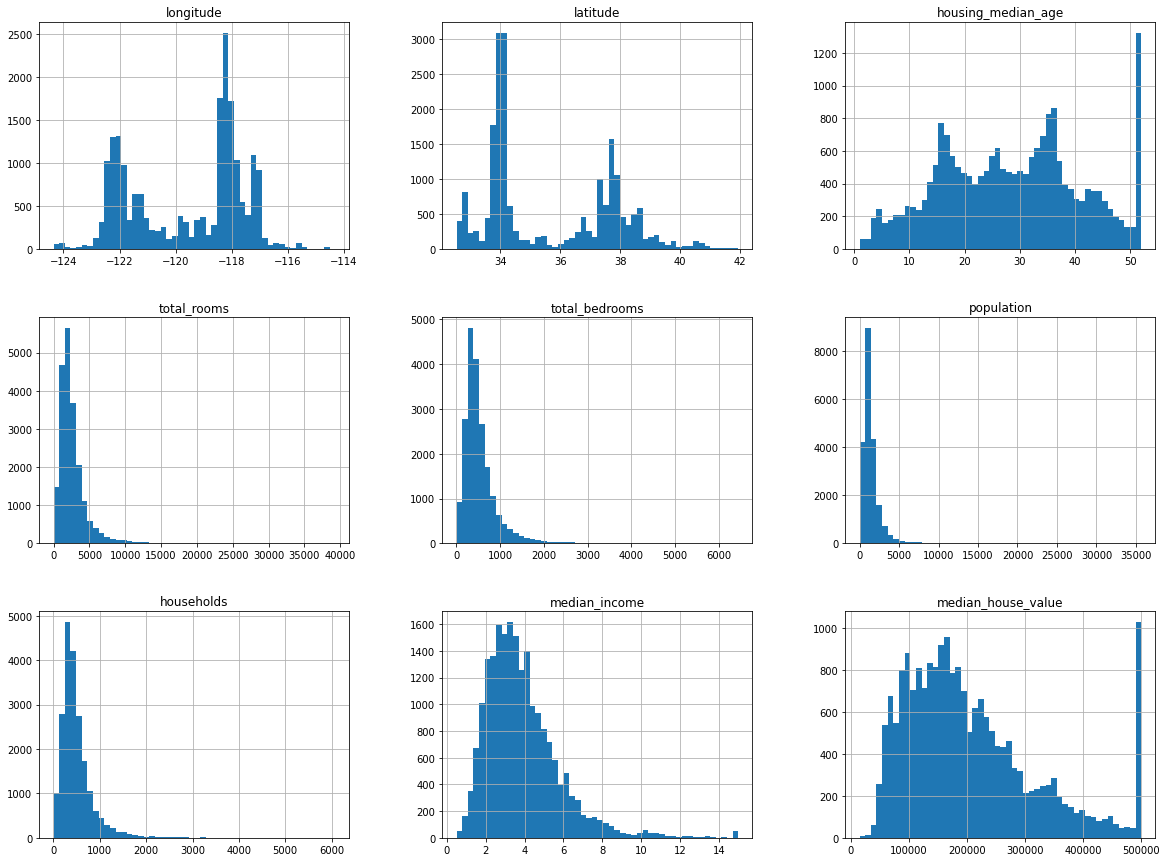

In [14]:
%matplotlib inline
import matplotlib.pyplot as plt
housing.hist(bins=50, figsize = (20,15))
plt.show()

In [15]:
import sklearn
import numpy as np
from sklearn.model_selection import train_test_split

In [16]:
train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

In [17]:
housing['income_cat']= pd.cut(housing['median_income'],
                             bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                             labels=[1,2,3,4,5])

In [18]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=0)
for train_index, test_index in split.split(housing, housing['income_cat']):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [19]:
strat_test_set['income_cat'].value_counts() / len(strat_test_set)

3    0.350533
2    0.318798
4    0.176357
5    0.114341
1    0.039971
Name: income_cat, dtype: float64

In [20]:
for set_ in (strat_train_set, strat_test_set):
    set_.drop('income_cat', axis=1, inplace=True)

In [21]:
housing = strat_train_set.copy()

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

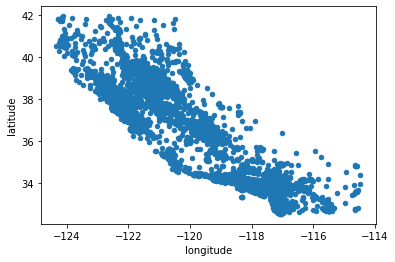

In [22]:
housing.plot(kind='scatter', x='longitude', y='latitude')

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

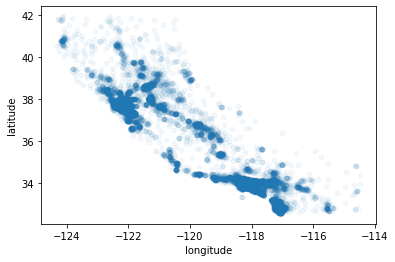

In [23]:
housing.plot(kind='scatter', x='longitude', y='latitude', alpha=0.05)

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

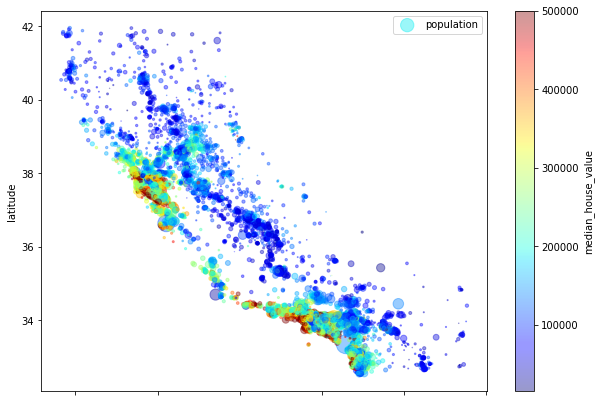

In [24]:
housing.plot(kind='scatter', x='longitude', y='latitude', alpha=0.4,
            s=housing['population']/100, label='population', figsize=(10,7),
            c='median_house_value', cmap=plt.get_cmap('jet'), colorbar=True)

In [25]:
corr_matrix = housing.corr()

In [26]:
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688988
total_rooms           0.137430
housing_median_age    0.107227
households            0.069089
total_bedrooms        0.053455
population           -0.023882
longitude            -0.042943
latitude             -0.145757
Name: median_house_value, dtype: float64

array([[<AxesSubplot:xlabel='median_house_value', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='median_income', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='median_house_value'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='median_income'>,
        <AxesSubplot:xlabel='median_income', ylabel='median_income'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='median_income'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='median_income'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='median_income', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='total_rooms'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='housing_median_age'>,
        <AxesSubplot:xlabel='median_incom

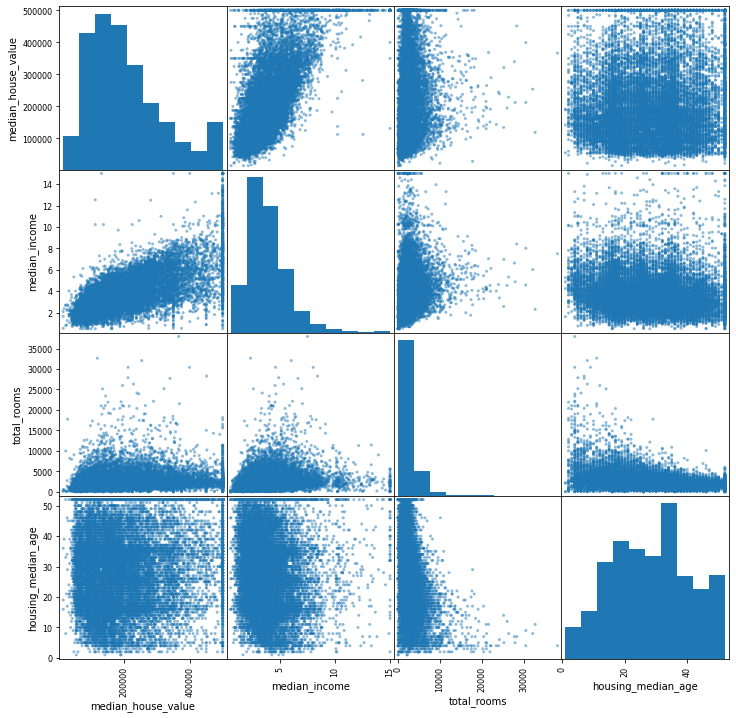

In [27]:
from pandas.plotting import scatter_matrix

attributes = ['median_house_value', 'median_income', 'total_rooms', 'housing_median_age']
scatter_matrix(housing[attributes], figsize=(12,12))

<AxesSubplot:xlabel='median_income', ylabel='median_house_value'>

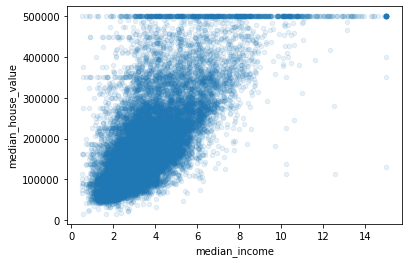

In [28]:
housing.plot(kind='scatter', x='median_income', y='median_house_value', alpha=0.1)

In [29]:
housing['rooms_per_household'] = housing['total_rooms']/housing['households']
housing['bedrooms_per_room'] = housing['total_bedrooms']/housing['total_rooms']
housing['population_per_household'] = housing['population']/housing['households']

In [30]:
corr_matrix = housing.corr()

In [31]:
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.688988
rooms_per_household         0.157680
total_rooms                 0.137430
housing_median_age          0.107227
households                  0.069089
total_bedrooms              0.053455
population                 -0.023882
population_per_household   -0.026893
longitude                  -0.042943
latitude                   -0.145757
bedrooms_per_room          -0.255922
Name: median_house_value, dtype: float64

In [32]:
housing = strat_train_set.drop('median_house_value', axis=1)

In [33]:
housing_labels = strat_train_set['median_house_value'].copy()

In [34]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='median')

In [35]:
housing_num = housing.drop('ocean_proximity', axis=1)

In [36]:
imputer.fit(housing_num)

SimpleImputer(strategy='median')

In [37]:
imputer.statistics_

array([-118.49  ,   34.25  ,   29.    , 2129.    ,  436.    , 1167.    ,
        410.    ,    3.5343])

In [38]:
housing_num.median().values

array([-118.49  ,   34.25  ,   29.    , 2129.    ,  436.    , 1167.    ,
        410.    ,    3.5343])

In [39]:
X = imputer.transform(housing_num)
housing_tr = pd.DataFrame(X, columns=housing_num.columns,
                         index=housing_num.index)

In [40]:
housing_cat = housing[['ocean_proximity']]

In [41]:
housing_cat.head(10)

,ocean_proximity
19328,<1H OCEAN
4806,<1H OCEAN
15645,NEAR BAY
2975,INLAND
18823,INLAND
6697,<1H OCEAN
16825,NEAR OCEAN
1485,NEAR BAY
7312,<1H OCEAN
6698,<1H OCEAN


In [42]:
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder()

In [43]:
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)
housing_cat_encoded[:10]

array([[0.],
       [0.],
       [3.],
       [1.],
       [1.],
       [0.],
       [4.],
       [3.],
       [0.],
       [0.]])

In [44]:
ordinal_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [45]:
from sklearn.preprocessing import OneHotEncoder
cat_encoder = OneHotEncoder()
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
housing_cat_1hot

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [46]:
housing_cat_1hot.toarray()

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.],
       ...,
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.]])

In [47]:
cat_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [48]:
from sklearn.base import BaseEstimator, TransformerMixin

rooms_ix, bedrooms_ix, population_ix, households_ix = 3,4,5,6

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room=True):
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X, y=None):
        return self
    def transform(self,X):
        rooms_per_household = X[:, rooms_ix]/X[:,households_ix]
        population_per_household = X[:, population_ix]/X[:, households_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix]/X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household, bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]

In [49]:
attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(housing.values)

In [50]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [51]:
num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('attribs_adder', CombinedAttributesAdder()),
    ('std_scaler', StandardScaler()),
])

In [52]:
housing_num_tr = num_pipeline.fit_transform(housing_num)

In [53]:
from sklearn.compose import ColumnTransformer

In [54]:
num_attribs = list(housing_num)
cat_attribs = ['ocean_proximity']

full_pipeline = ColumnTransformer([
    ('num', num_pipeline, num_attribs),
    ('cat', OneHotEncoder(), cat_attribs),
])

In [56]:
housing_prepared = full_pipeline.fit_transform(housing)

In [57]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)

LinearRegression()

In [58]:
some_data = housing.iloc[:5]
some_labels = housing_labels.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)
print('predicitons:', lin_reg.predict(some_data_prepared))

predicitons: [227885.17864683 199641.86684096 250266.3411042  236655.89283764
  11125.78759881]


In [59]:
print('labels:', list(some_labels))

labels: [187800, 136600, 400000, 106300, 43500]


In [60]:
from sklearn.metrics import mean_squared_error

housing_predictions = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

68286.41923036716

In [61]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()
tree_reg.fit(housing_prepared, housing_labels)

DecisionTreeRegressor()

In [63]:
housing_predictions = tree_reg.predict(housing_prepared)
tree_mse = mean_squared_error(housing_labels, housing_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

In [64]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_reg, housing_prepared, housing_labels,
                        scoring='neg_mean_squared_error', cv=10)

tree_rmse_scores = np.sqrt(-scores)

In [65]:
def display_scores(scores):
    print('scores:', scores)
    print('mean:', scores.mean())
    print('Std. Dv:', scores.std())


In [66]:
display_scores(tree_rmse_scores)

scores: [69219.16289773 72116.45332374 71460.02909073 69865.24870536
 71553.41701002 74081.13874604 70913.72232662 68561.71440424
 71340.44797175 69956.07111386]
mean: 70906.74055900765
Std. Dv: 1509.5768289188454


In [67]:
lin_scores = cross_val_score(lin_reg, housing_prepared, housing_labels,
                            scoring='neg_mean_squared_error', cv=10)

lin_rmse_scores = np.sqrt(-lin_scores)

In [68]:
display_scores(lin_rmse_scores)

scores: [65993.97246676 69010.24806374 71413.83112493 68742.95840851
 68937.97597951 66882.38169636 68302.97258028 66747.85112588
 69786.49966527 69063.19231501]
mean: 68488.18834262603
Std. Dv: 1515.8560925367467


In [69]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor()
forest_reg.fit(housing_prepared, housing_labels)

RandomForestRegressor()

In [70]:
forest_scores = cross_val_score(forest_reg, housing_prepared, housing_labels,
                            scoring='neg_mean_squared_error', cv=10)

forest_rmse_scores = np.sqrt(-forest_scores)

In [71]:
display_scores(forest_rmse_scores)

scores: [47413.37889735 51857.59451147 50524.6430988  50654.39519356
 51678.34991571 47214.58168675 49948.61867211 49379.19283185
 51620.9134811  50401.92345882]
mean: 50069.35917475207
Std. Dv: 1566.8120747945416


In [78]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    
    {
        'n_estimators':[3,10,30],
        'max_features':[2,4,6,8]
    },
    {
        'bootstrap':[False],
        'n_estimators':[3,10],
        'max_features':[2,3,4]
    }
]


In [79]:
forest_reg = RandomForestRegressor()

grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                          scoring='neg_mean_squared_error',
                          return_train_score=True)

grid_search.fit(housing_prepared, housing_labels)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [80]:
grid_search.best_params_

{'max_features': 6, 'n_estimators': 30}

In [81]:
grid_search.best_estimator_

RandomForestRegressor(max_features=6, n_estimators=30)

In [82]:
cvres = grid_search.cv_results_

In [83]:
for mean_score, params in zip(cvres['mean_test_score'], cvres['params']):
    print(np.sqrt(-mean_score), params)

64287.01520250843 {'max_features': 2, 'n_estimators': 3}
55447.01915028884 {'max_features': 2, 'n_estimators': 10}
52910.52452811637 {'max_features': 2, 'n_estimators': 30}
60320.13717046815 {'max_features': 4, 'n_estimators': 3}
52607.11321689149 {'max_features': 4, 'n_estimators': 10}
50576.38729086951 {'max_features': 4, 'n_estimators': 30}
59790.484912836204 {'max_features': 6, 'n_estimators': 3}
52496.72608578645 {'max_features': 6, 'n_estimators': 10}
50139.102066482585 {'max_features': 6, 'n_estimators': 30}
59257.25539465287 {'max_features': 8, 'n_estimators': 3}
52222.60839788796 {'max_features': 8, 'n_estimators': 10}
50477.47719316942 {'max_features': 8, 'n_estimators': 30}
63322.16940926701 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
54409.22355825111 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
60540.519245124946 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
51996.360752972985 {'bootstrap': False, 'max_features': 3, 'n_estimators'

In [84]:
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

array([7.81124556e-02, 6.72486619e-02, 4.02012780e-02, 1.81459493e-02,
       1.72512672e-02, 1.66146813e-02, 1.62345677e-02, 3.32336005e-01,
       6.63637561e-02, 1.08586147e-01, 5.87683472e-02, 1.26369476e-02,
       1.59290692e-01, 1.58895556e-04, 4.47980497e-03, 3.57054419e-03])

In [85]:
extra_attribs = ['rooms_per_hhold', 'pop_per_hhold', 'bedrooms_per_room']
cat_encoder = full_pipeline.named_transformers_['cat']
cat_one_hot_attribs = list(cat_encoder.categories_[0])
attributes = num_attribs + extra_attribs + cat_one_hot_attribs

In [86]:
sorted(zip(feature_importances, attributes), reverse=True)

[(0.3323360051439429, 'median_income'),
 (0.15929069169761664, 'INLAND'),
 (0.10858614669529386, 'pop_per_hhold'),
 (0.07811245559330811, 'longitude'),
 (0.06724866190087746, 'latitude'),
 (0.0663637561184943, 'rooms_per_hhold'),
 (0.058768347165797395, 'bedrooms_per_room'),
 (0.04020127795678461, 'housing_median_age'),
 (0.018145949317249613, 'total_rooms'),
 (0.01725126717864536, 'total_bedrooms'),
 (0.016614681287909185, 'population'),
 (0.016234567673683777, 'households'),
 (0.012636947557529216, '<1H OCEAN'),
 (0.00447980496515706, 'NEAR BAY'),
 (0.003570544192000232, 'NEAR OCEAN'),
 (0.00015889555571021064, 'ISLAND')]

In [87]:
final_model = grid_search.best_estimator_

X_test = strat_test_set.drop('median_house_value', axis=1)
y_test = strat_test_set['median_house_value'].copy()

X_test_prepared = full_pipeline.transform(X_test)

final_predictions = final_model.predict(X_test_prepared)
final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)

final_rmse

48188.1735061975

In [88]:
from scipy import stats

confidence = 0.95
squared_errors = (final_predictions - y_test) ** 2
np.sqrt(stats.t.interval(confidence, len(squared_errors) - 1,
                        loc=squared_errors.mean(),
                        scale=stats.sem(squared_errors)))

array([46074.90686787, 50212.57899017])